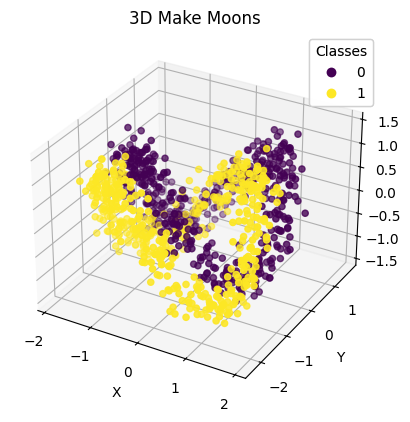

In [1]:
# Generating 3D make-moons data

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def make_moons_3d(n_samples=500, noise=0.1):
    # Generate the original 2D make_moons data
    t = np.linspace(0, 2 * np.pi, n_samples)
    x = 1.5 * np.cos(t)
    y = np.sin(t)
    z = np.sin(2 * t)  # Adding a sinusoidal variation in the third dimension

    # Concatenating the positive and negative moons with an offset and noise
    X = np.vstack([np.column_stack([x, y, z]), np.column_stack([-x, y - 1, -z])])
    y = np.hstack([np.zeros(n_samples), np.ones(n_samples)])

    # Adding Gaussian noise
    X += np.random.normal(scale=noise, size=X.shape)

    return X, y

# Generate the data (1000 datapoints)
X, labels = make_moons_3d(noise=0.2)

# 保存到 "train.txt"，格式为 x y z label
with open("test.txt", "w") as f:
    for i in range(len(X)):
        f.write(f"{X[i,0]} {X[i,1]} {X[i,2]} {int(labels[i])}\n")

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', marker='o')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Make Moons')
plt.show()

决策树准确率: 0.965000
AdaBoost + 决策树准确率: 0.983000
SVM with linear kernel: 0.672000
SVM with poly kernel: 0.863000
SVM with rbf kernel: 0.989000


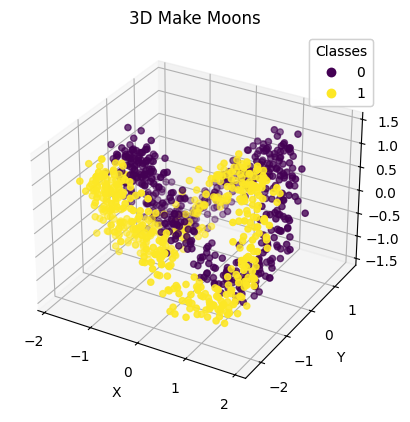

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 读取训练集和测试集
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :3]  # 特征
    y = data[:, 3]   # 标签
    return X, y

def train(X_train, y_train, X_test, y_test, cycles):
    #训练决策模型
    # 1. 决策树分类器
    #dt_clf = DecisionTreeClassifier(criterion='entropy')
    dt_clf = DecisionTreeClassifier(criterion='gini')
    dt_clf.fit(X_train, y_train)

    # 2. AdaBoost + 决策树分类器
    ada_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=8), n_estimators=50, algorithm='SAMME')
    ada_clf.fit(X_train, y_train)

    svm_clf1 = SVC(kernel='linear')
    svm_clf1.fit(X_train, y_train)

    svm_clf2 = SVC(kernel='poly', degree=3)
    svm_clf2.fit(X_train, y_train)

    svm_clf3 = SVC(kernel='rbf', gamma='scale')
    svm_clf3.fit(X_train, y_train)

    acc_dt = 0
    acc_ada = 0
    acc_svm1 = 0
    acc_svm2 = 0
    acc_svm3 = 0
    #训练完的模型在测试集上效果
    for i in range(cycles):
        y_pred_dt = dt_clf.predict(X_test)
        acc_dt += accuracy_score(y_test, y_pred_dt)

        y_pred_ada = ada_clf.predict(X_test)
        acc_ada += accuracy_score(y_test, y_pred_ada)

        y_pred_svm1 = svm_clf1.predict(X_test)
        acc_svm1 += accuracy_score(y_test, y_pred_svm1)

        y_pred_svm2 = svm_clf2.predict(X_test)
        acc_svm2 += accuracy_score(y_test, y_pred_svm2)

        y_pred_svm3 = svm_clf3.predict(X_test)
        acc_svm3 += accuracy_score(y_test, y_pred_svm3)

    print(f"决策树准确率: {acc_dt / 10:.6f}")
    print(f"AdaBoost + 决策树准确率: {acc_ada / 10:.6f}")
    print(f"SVM with linear kernel: {acc_svm1 / 10:.6f}")
    print(f"SVM with poly kernel: {acc_svm2 / 10:.6f}")
    print(f"SVM with rbf kernel: {acc_svm3 / 10:.6f}")

    plot_prediction(X_test, ada_clf)

def plot_prediction(X, clf):
    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    labels = clf.predict(X)
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', marker='o')
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('3D Make Moons')
    plt.show()


if __name__ == "__main__":
    X_train, y_train = load_data("train.txt")
    X_test, y_test = load_data("test.txt")
    train(X_train, y_train, X_test, y_test, 10)